In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from util import DataHandler

In [ ]:
DH = DataHandler('Bodegraven.csv',' TR2')
data = DH.return_data()
data.head()

,hist_timestamp,avg_value,max_value,min_value,locatie,spanning(kV),transformator,jumps,number_tap_changes
0,2024-07-24 11:15:00+00:00,8.0,8.0,8.0,Bodegraven,50-10,TR1,0.0,0.0
1,2024-07-24 11:30:00+00:00,8.0,8.0,8.0,Bodegraven,50-10,TR1,0.0,0.0
2,2024-07-24 11:45:00+00:00,8.0,8.0,8.0,Bodegraven,50-10,TR1,0.0,0.0
3,2024-07-24 12:00:00+00:00,8.0,8.0,8.0,Bodegraven,50-10,TR1,0.0,0.0
4,2024-07-24 12:15:00+00:00,8.0,8.0,8.0,Bodegraven,50-10,TR1,0.0,0.0


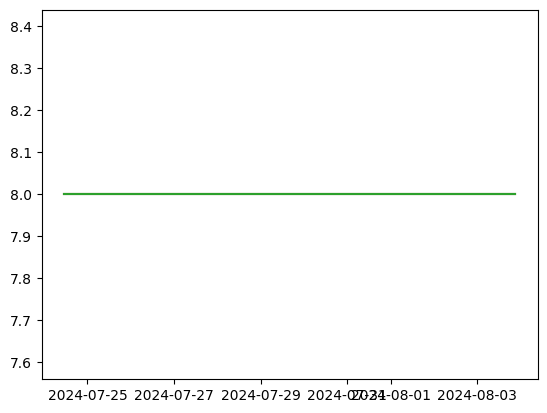

In [5]:
data_part = data.iloc[:1000]
plt.plot(data_part['hist_timestamp'],data_part['avg_value'])
plt.plot(data_part['hist_timestamp'],data_part['max_value'])
plt.plot(data_part['hist_timestamp'],data_part['min_value'])
plt.show()

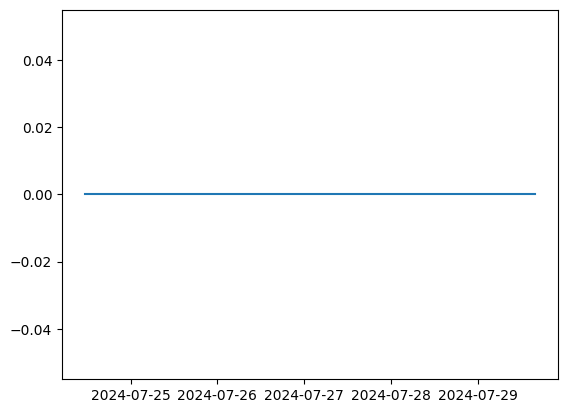

In [6]:
data_part = data.iloc[:500]
plt.plot(data_part['hist_timestamp'],data_part['jumps'])
plt.show()

In [7]:
data.describe()

,avg_value,max_value,min_value,jumps,number_tap_changes
count,14115.000000,14115.000000,14115.000000,14115.000000,14115.000000
mean,7.922502,7.943080,7.900728,0.084662,334.439107
std,0.283203,0.280347,0.308978,0.278387,406.475807
min,7.000000,7.000000,7.000000,0.000000,0.000000
25%,8.000000,8.000000,8.000000,0.000000,0.000000
50%,8.000000,8.000000,8.000000,0.000000,47.000000
75%,8.000000,8.000000,8.000000,0.000000,667.000000
max,9.000000,9.000000,9.000000,1.000000,1195.000000


coefficients [-3.08462205e+02  9.11012204e-02]


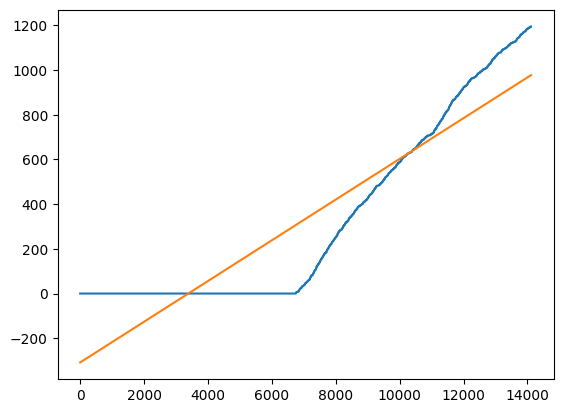

In [8]:
X = np.array([data.index])
X = np.concat((np.array([[1]*len(data)]),X),axis=0).T
Y = data['number_tap_changes']
beta = np.linalg.inv(X.T @ X) @ X.T @ Y
print('coefficients',beta)
plt.plot(data.index,Y)
plt.plot(data.index,X @ beta)
plt.show()

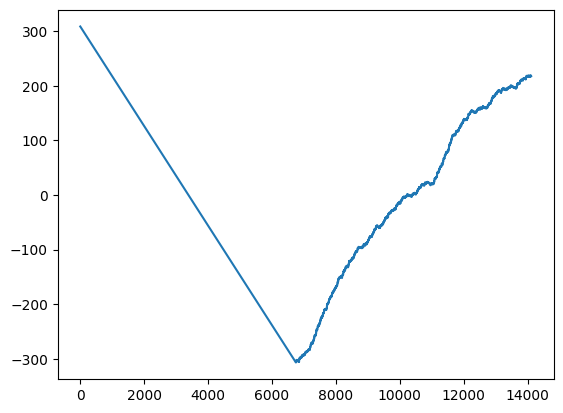

In [9]:
plt.plot(data.index,Y - X @ beta)
plt.show()

In [10]:
from prophet import Prophet
m = Prophet()
prophet_data = data.copy()
prophet_data.rename(columns={'number_tap_changes':'y','hist_timestamp':'ds'},inplace=True)
prophet_data['test'] = prophet_data['y'].iloc[1:]
prophet_data.loc[0,'test'] = 0 

prophet_data.iloc[-300:]
print(prophet_data)

def remove_timezone(dt):
   
    # HERE `dt` is a python datetime 
    # object that used .replace() method
    return dt.replace(tzinfo=None)
 
# APPLY THE ABOVE FUNCTION TO
# REMOVE THE TIMEZONE INFORMATION
# FROM EACH RECORD OF TIMESTAMP COLUMN IN DATAFRAME
prophet_data['ds'] = prophet_data['ds'].apply(remove_timezone)

m.fit(prophet_data)  # df is a pandas.DataFrame with 'y' and 'ds' columns
prediction = m.predict(prophet_data)
prediction.head()


c:\Users\maile\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


                             ds  avg_value  max_value  min_value     locatie  \
0     2024-07-24 11:15:00+00:00        8.0        8.0        8.0  Bodegraven   
1     2024-07-24 11:30:00+00:00        8.0        8.0        8.0  Bodegraven   
2     2024-07-24 11:45:00+00:00        8.0        8.0        8.0  Bodegraven   
3     2024-07-24 12:00:00+00:00        8.0        8.0        8.0  Bodegraven   
4     2024-07-24 12:15:00+00:00        8.0        8.0        8.0  Bodegraven   
...                         ...        ...        ...        ...         ...   
14110 2024-12-18 11:30:00+00:00        8.0        8.0        8.0  Bodegraven   
14111 2024-12-18 11:45:00+00:00        8.0        8.0        8.0  Bodegraven   
14112 2024-12-18 12:00:00+00:00        8.0        8.0        8.0  Bodegraven   
14113 2024-12-18 12:15:00+00:00        8.0        8.0        8.0  Bodegraven   
14114 2024-12-18 12:30:00+00:00        8.0        8.0        8.0  Bodegraven   

      spanning(kV) transformator  jumps

01:43:58 - cmdstanpy - INFO - Chain [1] start processing
01:44:16 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-07-24 11:15:00,-0.881399,-9.116623,7.199494,-0.881399,-0.881399,0.133484,0.133484,0.133484,-0.046883,-0.046883,-0.046883,0.180367,0.180367,0.180367,0.0,0.0,0.0,-0.747914
1,2024-07-24 11:30:00,-0.878944,-8.738443,7.727771,-0.878944,-0.878944,0.141480,0.141480,0.141480,-0.054825,-0.054825,-0.054825,0.196305,0.196305,0.196305,0.0,0.0,0.0,-0.737464
2,2024-07-24 11:45:00,-0.876490,-8.816474,7.281375,-0.876490,-0.876490,0.147847,0.147847,0.147847,-0.064486,-0.064486,-0.064486,0.212333,0.212333,0.212333,0.0,0.0,0.0,-0.728643
3,2024-07-24 12:00:00,-0.874035,-8.867665,7.279886,-0.874035,-0.874035,0.153089,0.153089,0.153089,-0.075356,-0.075356,-0.075356,0.228445,0.228445,0.228445,0.0,0.0,0.0,-0.720946
4,2024-07-24 12:15:00,-0.871581,-8.430235,7.640202,-0.871581,-0.871581,0.157722,0.157722,0.157722,-0.086913,-0.086913,-0.086913,0.244634,0.244634,0.244634,0.0,0.0,0.0,-0.713859


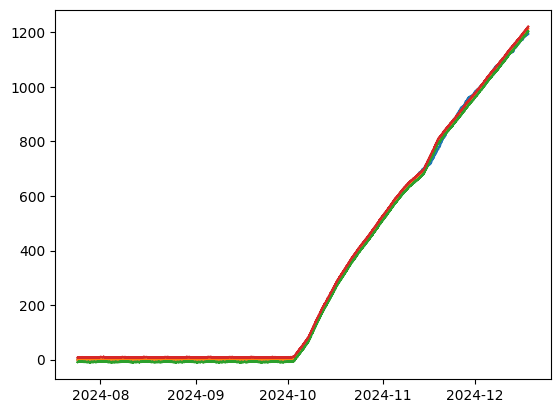

In [11]:
plt.plot(data['hist_timestamp'],data['number_tap_changes'])
plt.plot(prediction['ds'],prediction['yhat'])
plt.plot(prediction['ds'],prediction['yhat_lower'])
plt.plot(prediction['ds'],prediction['yhat_upper'])
plt.show()

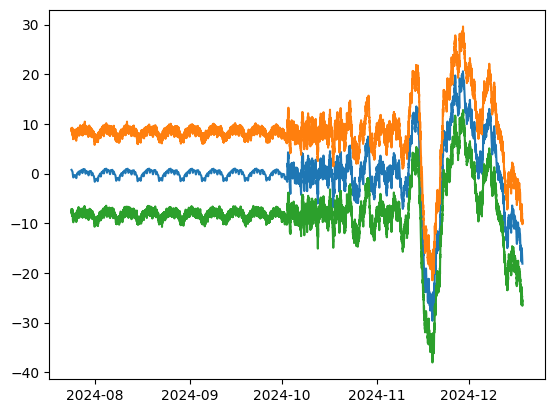

In [12]:
plt.plot(prediction['ds'],data['number_tap_changes'] - prediction['yhat'])
plt.plot(prediction['ds'],data['number_tap_changes'] - prediction['yhat_lower'])
plt.plot(prediction['ds'],data['number_tap_changes'] - prediction['yhat_upper'])
plt.show()

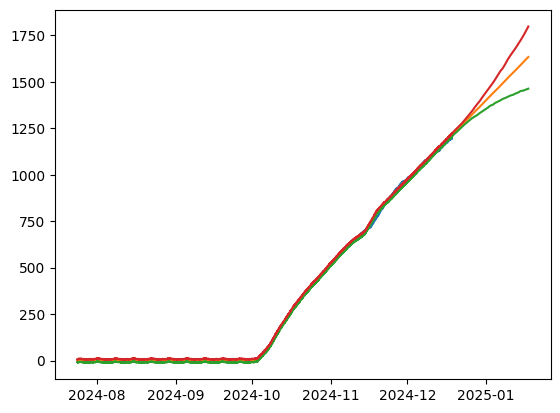

In [13]:
future = m.make_future_dataframe(periods=30)
future_prediction = m.predict(future)
plt.plot(data['hist_timestamp'],data['number_tap_changes'])
plt.plot(future_prediction['ds'],future_prediction['yhat'])
plt.plot(future_prediction['ds'],future_prediction['yhat_lower'])
plt.plot(future_prediction['ds'],future_prediction['yhat_upper'])
plt.show()